<a href="https://colab.research.google.com/github/kanacb/pythonmasterclass/blob/main/Lesson13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 13
The objective is to use REGEX to read whats app messages from the whatsapp chat messages. Export the chat messages and using this program to check the REGEX. 

[Test your regular expression](https://regexr.com/)

In [1]:
!pip install stopwords
!pip install emoji

     |████████████████████████████████| 170 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=254aed06c98a22daa518e9388d43837f490b0ccda269d5d4ea3f213ef7b150f5
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [2]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import nltk 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
#from nltk.corpus
import stopwords
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [3]:
def startsWithDateAndTime(s):
    pattern = '^\d{1,2}/\d{1,2}/\d{1,4}, \d{1,2}:\d{1,2}\S [AaPp][Mm] -'
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # Nombre
        '([\w]+[\s]+[\w]+):',              # Nombre + Apellido
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # Nombre + Segundo Nombre + Apellido
        '([\w]+)[\u263a-\U0001f999]+:',    # Nombre con Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return dateTime, author, message

In [8]:
conversationPath = '/content/whatsapp_text.txt'

In [9]:
parsedData = [] 

with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() 
    messageBuffer = [] 
    datetime, author = None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([dateTime, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            dateTime, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

chat = pd.DataFrame(parsedData, columns=['DateTime', 'Author', 'Message']) 

In [10]:
chat["DateTime"] = pd.to_datetime(chat["DateTime"])
chat['date'] = [d.date() for d in chat['DateTime']] #column date
chat['messages'] = 0
chat.index = chat['date']
chat = chat.drop(columns=['DateTime','Message','date'])
chat = chat.groupby(['date','Author']).count().reset_index()
chat = pd.DataFrame(chat)
chat.index = chat['date']
chat = chat.drop(columns=['date'])
chat = chat.pivot(columns=['Author'],values='messages')
chat = chat.cumsum()
df1 = chat
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)
df1

Author,Cheong Hom Tai,Emily KCOM,Izzati,Kana Sabaratnam
date,,,,
2021-08-23,4.0,3.0,1.0,2.0
2021-08-25,NaN,4.0,NaN,NaN
2021-08-30,NaN,NaN,NaN,5.0
2021-09-14,NaN,5.0,NaN,NaN


In [11]:
df2 = df1.max()
df2.sort_values(ascending=False)

Author
Kana Sabaratnam    5.0
Emily KCOM         5.0
Cheong Hom Tai     4.0
Izzati             1.0
dtype: float64

IndexError: ignored

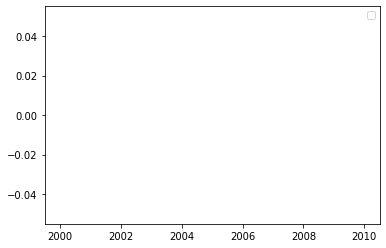

In [12]:
import matplotlib.animation as ani
color = ['red', 'green', 'blue', 'orange','purple','gold']
fig = plt.figure()
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.1, top = 10.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Cock Messages')
plt.xlabel('Dates')
plt.title('Load of crap')
def buildmebarchart(i=int):
  plt.legend(df1.columns)
  p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
  for i in range(0,38):
    p[i].set_color(color[i%6]) #set the colour of each curve
animator = ani.FuncAnimation(fig, buildmebarchart,interval=200)
plt.close()
from IPython.display import HTML
HTML(animator.to_html5_video())
